In [136]:
# RQ2

In [137]:
import pickle

with open('youtube_dl.pkl', 'rb') as file:
    results = pickle.load(file)


In [138]:
results

Subject                                                                   pysnooper
ID                                                                                3
Run Approach                                                                       
1   InputsFromHell-MoreOfTheSame  {'unique': 96, 'failing': 91, 'passing': 0, 'u...
    EvoGGen                       {'unique': 69, 'failing': 69, 'passing': 0, 'u...
2   InputsFromHell-MoreOfTheSame  {'unique': 92, 'failing': 87, 'passing': 1, 'u...
    EvoGGen                       {'unique': 69, 'failing': 69, 'passing': 0, 'u...
3   InputsFromHell-MoreOfTheSame  {'unique': 94, 'failing': 88, 'passing': 1, 'u...
    EvoGGen                       {'unique': 64, 'failing': 64, 'passing': 0, 'u...
4   InputsFromHell-MoreOfTheSame  {'unique': 93, 'failing': 84, 'passing': 1, 'u...
    EvoGGen                       {'unique': 69, 'failing': 69, 'passing': 0, 'u...
5   InputsFromHell-MoreOfTheSame  {'unique': 97, 'failing': 93, 'passing': 0, 'u...
    EvoGGen                       {'unique': 73, 'failing': 73, 'passing': 0, 'u...
6   InputsFromHell-MoreOfTheSame  {'unique': 97, 'failing': 90, 'passing': 1, 'u...
    EvoGGen                       {'unique': 69, 'failing': 69, 'passing': 0, 'u...
7   InputsFromHell-MoreOfTheSame  {'unique': 96, 'failing': 91, 'passing': 1, 'u...
    EvoGGen                       {'unique': 67, 'failing': 67, 'passing': 0, 'u...
8   InputsFromHell-MoreOfTheSame  {'unique': 97, 'failing': 90, 'passing': 0, 'u...
    EvoGGen                       {'unique': 75, 'failing': 75, 'passing': 0, 'u...
9   InputsFromHell-MoreOfTheSame  {'unique': 93, 'failing': 87, 'passing': 2, 'u...
    EvoGGen                       {'unique': 59, 'failing': 59, 'passing': 0, 'u...
10  InputsFromHell-MoreOfTheSame  {'unique': 98, 'failing': 95, 'passing': 0, 'u...
    EvoGGen                       {'unique': 70, 'failing': 70, 'passing': 0, 'u...

In [142]:
import pandas as pd

def filtered_dataframe(dataframe):
    # Filter for rows where 'Approach' is 'EvoGGen'
    # filtered_df = dataframe.xs('EvoGGen', level='Approach')
    filtered_df = dataframe.xs('InputsFromHell-MoreOfTheSame', level='Approach')
    
    # Assuming you want to sum up all numeric values
    # Change the aggregation function as needed
    # aggregated_df = filtered_df.groupby(level='Run').sum()

    return filtered_df

# Using the 'main' function as you defined
filtered_results = filtered_dataframe(results)
print(filtered_results)


Subject                                          pysnooper
ID                                                       3
Run                                                       
1        {'unique': 96, 'failing': 91, 'passing': 0, 'u...
2        {'unique': 92, 'failing': 87, 'passing': 1, 'u...
3        {'unique': 94, 'failing': 88, 'passing': 1, 'u...
4        {'unique': 93, 'failing': 84, 'passing': 1, 'u...
5        {'unique': 97, 'failing': 93, 'passing': 0, 'u...
6        {'unique': 97, 'failing': 90, 'passing': 1, 'u...
7        {'unique': 96, 'failing': 91, 'passing': 1, 'u...
8        {'unique': 97, 'failing': 90, 'passing': 0, 'u...
9        {'unique': 93, 'failing': 87, 'passing': 2, 'u...
10       {'unique': 98, 'failing': 95, 'passing': 0, 'u...


In [143]:
def get_aggreagted_values(dataframe):
    unique_list = []
    failing_list = []
    passing_list = []
    for index, row in dataframe.iterrows():
        row_dict = row[("pysnooper", 3)]
        unique, failing, passing = row_dict['unique'], row_dict['failing'], row_dict['passing']
        unique_list.append(row_dict['unique'])
        failing_list.append(row_dict['failing'])
        passing_list.append(row_dict['passing'])
        ratio_list = []
    for failing, unique in zip(failing_list, unique_list):
        if unique != 0:  # Check to avoid division by zero
            ratio = failing / unique
        else:
            ratio = 1  # Or some other value to indicate undefined ratio
        ratio_list.append(round(ratio, 3))
    print(ratio_list, unique_list, failing_list, passing_list)

In [144]:
get_aggreagted_values(filtered_results)

[0.948, 0.946, 0.936, 0.903, 0.959, 0.928, 0.948, 0.928, 0.935, 0.969] [96, 92, 94, 93, 97, 97, 96, 97, 93, 98] [91, 87, 88, 84, 93, 90, 91, 90, 87, 95] [0, 1, 1, 1, 0, 1, 1, 0, 2, 0]


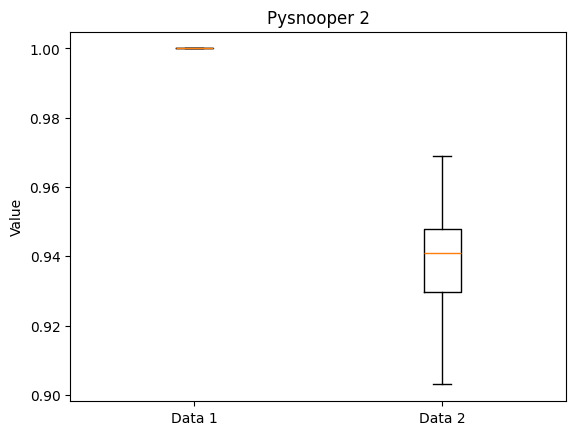

In [134]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Your first dataset
data_1_1 = [0.99, 0.98, 0.99, 0.99, 1.00, 0.99, 1.00, 1.00, 1.00, 0.99] # [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
data_1_2 = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

# Your second dataset
data_2_1 = [0.85, 0.84, 0.85, 0.83, 0.88, 0.85, 0.87, 0.83, 0.93, 0.89] # [0.948, 0.946, 0.936, 0.903, 0.959, 0.928, 0.948, 0.928, 0.935, 0.969]
data_2_2 = [0.948, 0.946, 0.936, 0.903, 0.959, 0.928, 0.948, 0.928, 0.935, 0.969]

# Create box plots for both datasets
plt.boxplot([data_1, data_2])

# Add title and labels as needed
plt.title("Pysnooper 2")
plt.ylabel("Value")
plt.xticks([1, 2], ['Data 1', 'Data 2'])  # Labeling the x-axis ticks

plt.show()

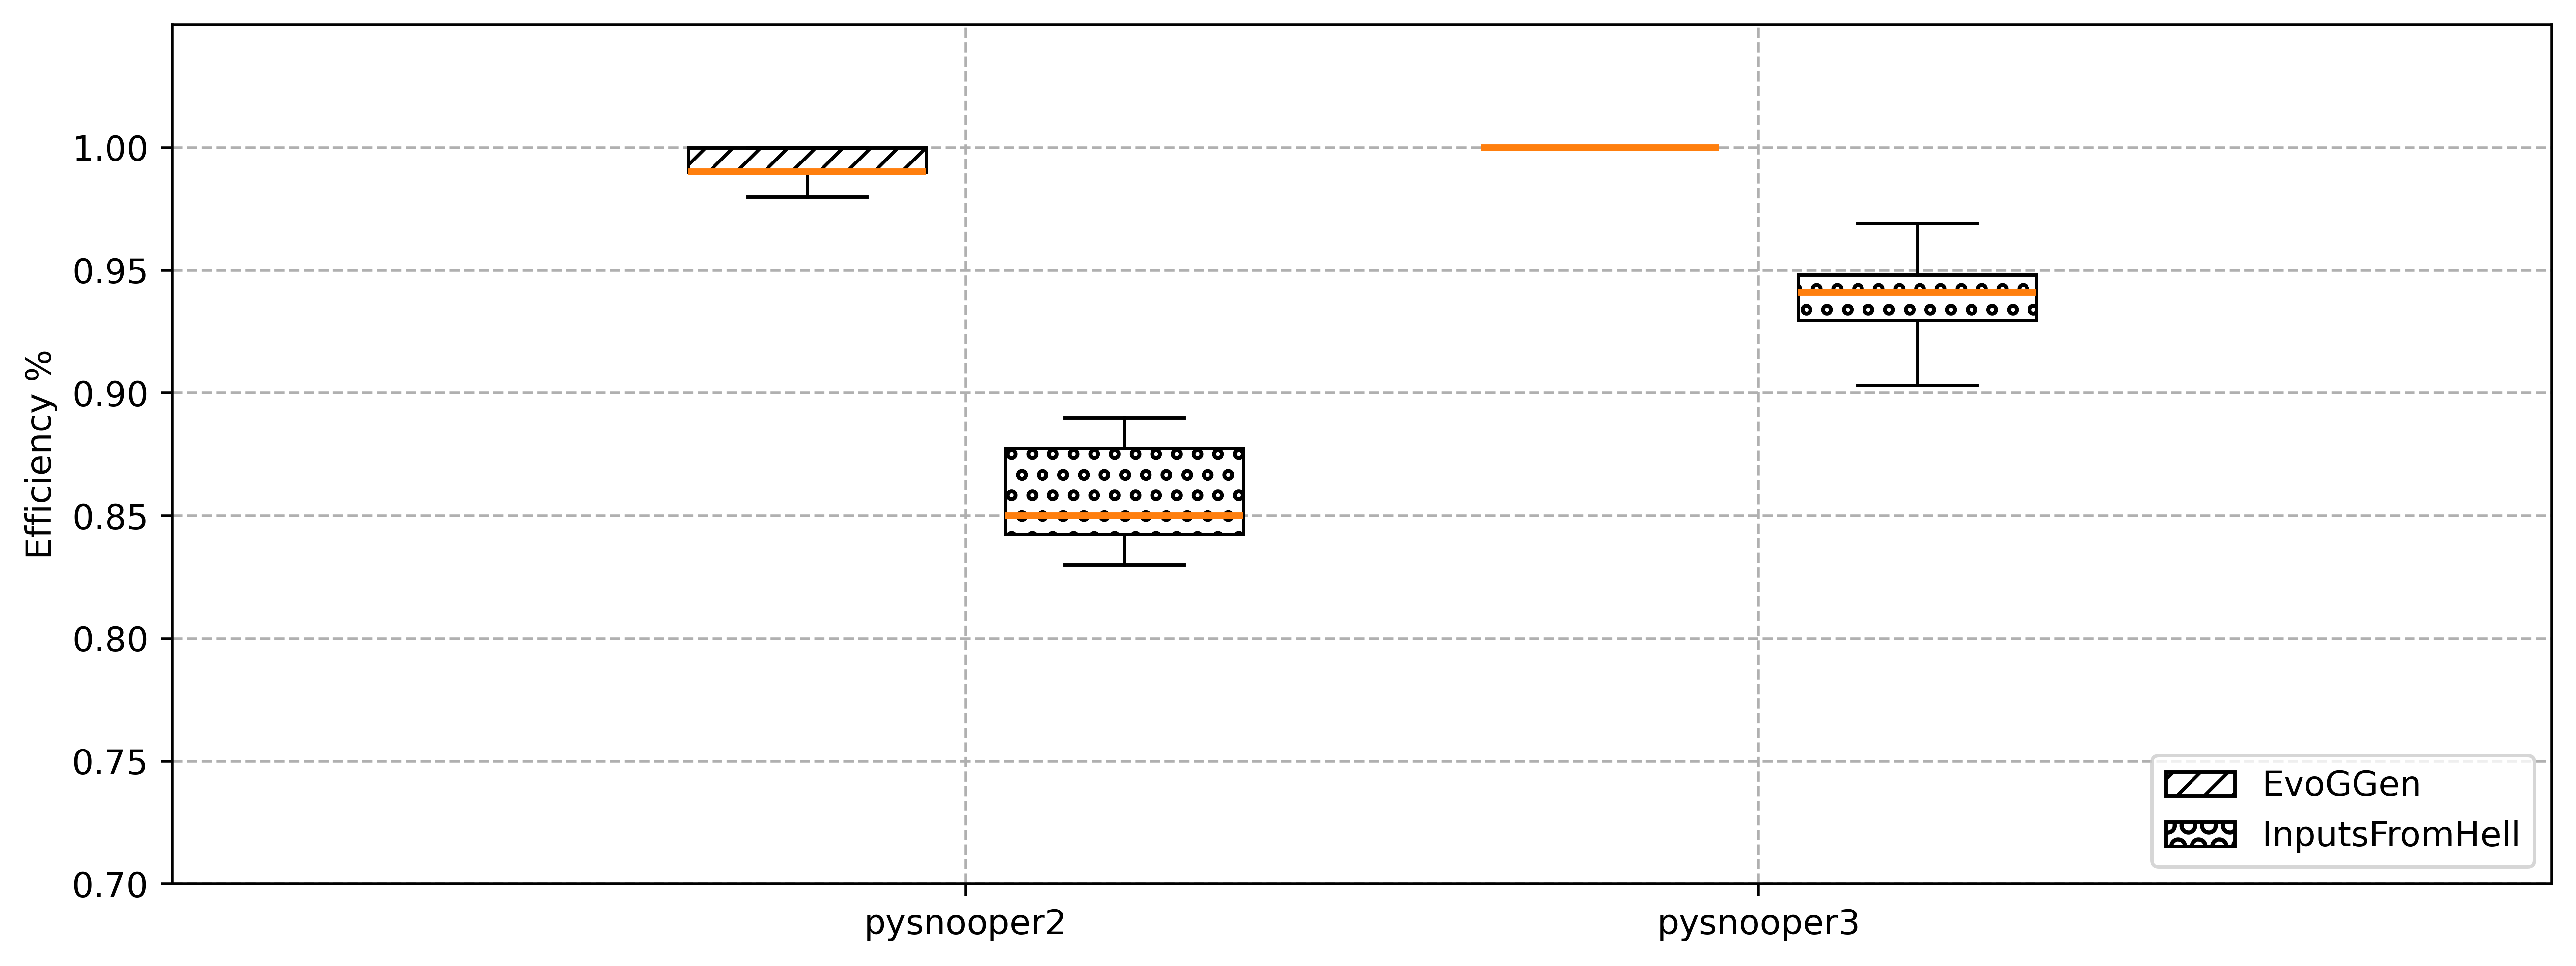

In [155]:
import matplotlib.patches as mpatches
import numpy as np

data_a = [data_1_1, data_1_2]
data_b = [data_2_1, data_2_2]
#data_c = transform_data(boosting)

# ticks = list(map(lambda c:c.split(".")[0],bugs))
ticks = ["pysnooper2", "pysnooper3"]

def set_box_color(bp, color):
    #plt.setp(bp['boxes'], color=color)
    #plt.setp(bp['whiskers'], color=color)
    #plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], linewidth=2)  

#plt.figure(figsize=(10.5, 5), dpi=100)

plt.figure(figsize=(10.5, 4), dpi=500)

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.6,patch_artist=True, showfliers=True)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4, sym='', widths=0.6,patch_artist=True, showfliers=True)
# bpm = plt.boxplot(data_c, positions=np.array(range(len(data_b)))*3.0+0.8, sym='', widths=0.6,patch_artist=True, showfliers=True)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')
# set_box_color(bpm, '#2C7BB6')


for box in bpl['boxes']:
    box.set(facecolor = 'white' )
    # change hatch
    box.set(hatch = '///')
    

for box in bpr['boxes']:
    box.set(facecolor = 'white' )
    # change hatch
    box.set(hatch = 'oo')
    
#for box in bpm['boxes']:
#    box.set(facecolor = 'white' )
#    # change hatch
#    box.set(hatch = "...")

# draw temporary red and blue lines and use them to create a legend
#plt.plot([], c='#D7191C', label='Decision Tree')
#plt.plot([], c='#2C7BB6', label='Random Forest')
#plt.plot([], c='#2C7BB6', label='Gradient Boosting Tree')

first_patch = mpatches.Patch(ec="black" ,fc = 'white', hatch="///", label='EvoGGen')
second_patch = mpatches.Patch(ec="black" ,fc = 'white', hatch="OO", label='InputsFromHell')
# third_patch = mpatches.Patch(ec="black" ,fc = 'white', hatch="...", label='Gradient Boosting Tree')

plt.legend(handles=[first_patch, second_patch], loc=4)
plt.grid(axis="y", linestyle='--',)
plt.grid(axis="x", linestyle='--',which='both')

plt.xticks(range(0, len(ticks) * 2,2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0.70, 1.05)
plt.ylabel('Efficiency %')
plt.yticks(np.arange(0.70, 1.04, 0.05))
plt.tight_layout()
# plt.savefig('AllResultsF1.png', dpi=100)
# plt.savefig('./savedPlots/boxPlotF1.pdf')